In [1]:
import numpy as np

def imputationByInterpolation(data):
    """
    Replaces missing values (NaN) in a time series dataset using linear interpolation.

    Parameters:
    -----------
    data : array-like
        One-dimensional array (time series) that may contain missing values (NaN).

    Returns:
    --------
    numpy.ndarray
        Copy of the input array with missing values replaced by linear interpolation.

    Notes:
    ------
    - For isolated missing values, the function uses the average of adjacent values.
    - For consecutive missing values, linear interpolation is used between the closest
      non-missing values.
    - Missing values at the beginning or end of the array are filled with the nearest
      non-missing value.

    Author: Claude
    Date: May 4, 2025
    """
    # Create a copy to avoid modifying the original array
    data = np.copy(data)

    # Check if data is empty or has no missing values
    if len(data) == 0 or not np.any(np.isnan(data)):
        return data

    # Identify missing values
    nans01 = np.isnan(data).astype(int)
    nans = np.where(nans01 == 1)[0]

    # Handle case where all values are NaN
    if len(nans) == len(data):
        return data  # Cannot interpolate if all values are missing

    # Handle missing values at the beginning
    if nans[0] == 0:
        # Find first non-NaN value
        first_valid = np.where(~np.isnan(data))[0][0]
        data[:first_valid] = data[first_valid]

        # Update nans after filling beginning values
        nans01 = np.isnan(data).astype(int)
        nans = np.where(nans01 == 1)[0]

        # If all NaNs were at beginning, we're done
        if len(nans) == 0:
            return data

    # Handle missing values at the end
    if nans[-1] == len(data) - 1:
        # Find last non-NaN value
        last_valid = np.where(~np.isnan(data))[0][-1]
        data[last_valid+1:] = data[last_valid]

        # Update nans after filling ending values
        nans01 = np.isnan(data).astype(int)
        nans = np.where(nans01 == 1)[0]

        # If all remaining NaNs were at end, we're done
        if len(nans) == 0:
            return data

    # Split the missing values into groups of consecutive indices
    groups = np.split(nans, np.where(np.diff(nans) != 1)[0] + 1)

    for g in groups:
        # Skip any empty groups (shouldn't happen, but just to be safe)
        if len(g) == 0:
            continue

        # For consecutive missing values, use linear interpolation
        if len(g) > 1:
            i_beg = g[0] - 1
            i_end = g[-1] + 1

            # Safety checks for index bounds
            if i_beg < 0 or i_end >= len(data) or np.isnan(data[i_beg]) or np.isnan(data[i_end]):
                continue  # Skip this group if bounds are invalid

            interpolation = np.linspace(data[i_beg], data[i_end], len(g) + 2)
            new_vals = interpolation[1:-1]

            for i, j in enumerate(g):
                data[j] = new_vals[i]

        # For isolated missing values, take average of adjacent numbers
        elif len(g) == 1:
            idx = g[0]
            if idx > 0 and idx < len(data) - 1:
                # Both neighbors exist
                if not np.isnan(data[idx-1]) and not np.isnan(data[idx+1]):
                    data[idx] = (data[idx-1] + data[idx+1]) / 2
                # Only left neighbor exists
                elif not np.isnan(data[idx-1]):
                    data[idx] = data[idx-1]
                # Only right neighbor exists
                elif not np.isnan(data[idx+1]):
                    data[idx] = data[idx+1]

    return data


Test Case 1: Single missing value in the middle
Original: [ 1.  2. nan  4.  5.]
Imputed:  [1. 2. 3. 4. 5.]

Test Case 2: Consecutive missing values
Original: [10. 20. nan nan nan 60. 70.]
Imputed:  [10. 20. 30. 40. 50. 60. 70.]

Test Case 3: Missing values at the beginning
Original: [nan nan 30. 40. 50.]
Imputed:  [30. 30. 30. 40. 50.]

Test Case 4: Missing values at the end
Original: [10. 20. 30. nan nan]
Imputed:  [10. 20. 30. 30. 30.]

Test Case 5: Mixed pattern of missing values
Original: [nan 10. nan nan 50. nan 70. nan]
Imputed:  [10.         10.         23.33333333 36.66666667 50.         60.
 70.         70.        ]

Test Case 6: Real-world time series example


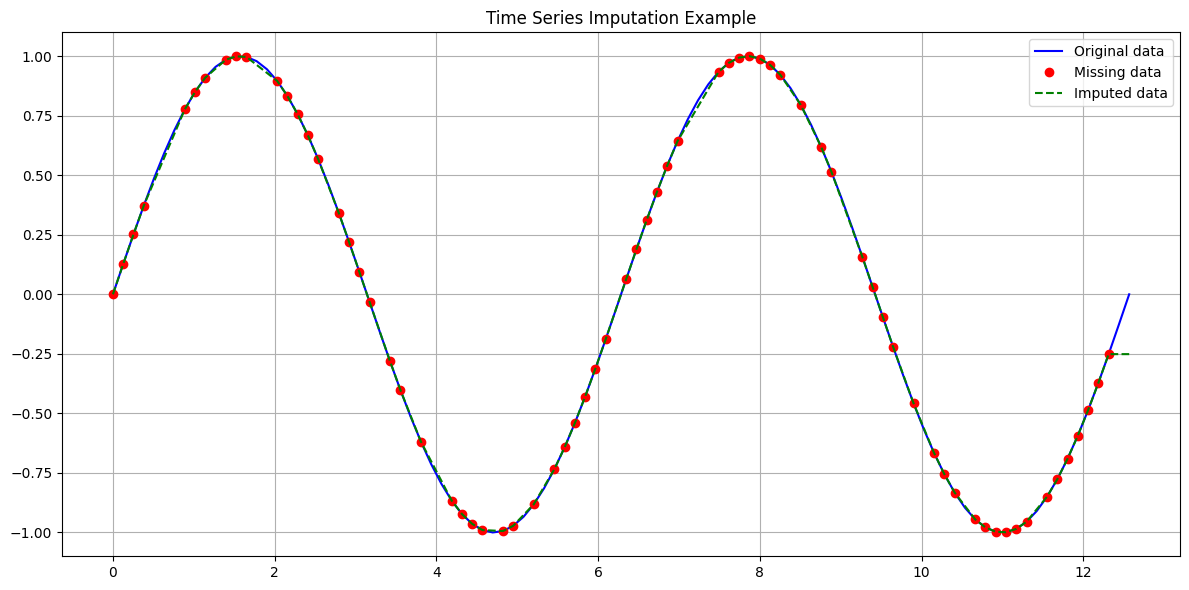

Mean Absolute Error on non-missing values: 0.000000
Mean Absolute Error on imputed values only: 0.022448


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import the imputation function
# Uncomment and use this if the function is in a separate file:
# from your_module import imputationByInterpolation

# Copy of the function for testing purposes
def imputationByInterpolation(data):
    """
    Replaces missing values (NaN) in a time series dataset using linear interpolation.

    Parameters:
    -----------
    data : array-like
        One-dimensional array (time series) that may contain missing values (NaN).

    Returns:
    --------
    numpy.ndarray
        Copy of the input array with missing values replaced by linear interpolation.
    """
    # Create a copy to avoid modifying the original array
    data = np.copy(data)

    # Check if data is empty or has no missing values
    if len(data) == 0 or not np.any(np.isnan(data)):
        return data

    # Identify missing values
    nans01 = np.isnan(data).astype(int)
    nans = np.where(nans01 == 1)[0]

    # Handle case where all values are NaN
    if len(nans) == len(data):
        return data  # Cannot interpolate if all values are missing

    # Handle missing values at the beginning
    if nans[0] == 0:
        # Find first non-NaN value
        first_valid = np.where(~np.isnan(data))[0][0]
        data[:first_valid] = data[first_valid]

        # Update nans after filling beginning values
        nans01 = np.isnan(data).astype(int)
        nans = np.where(nans01 == 1)[0]

        # If all NaNs were at beginning, we're done
        if len(nans) == 0:
            return data

    # Handle missing values at the end
    if nans[-1] == len(data) - 1:
        # Find last non-NaN value
        last_valid = np.where(~np.isnan(data))[0][-1]
        data[last_valid+1:] = data[last_valid]

        # Update nans after filling ending values
        nans01 = np.isnan(data).astype(int)
        nans = np.where(nans01 == 1)[0]

        # If all remaining NaNs were at end, we're done
        if len(nans) == 0:
            return data

    # Split the missing values into groups of consecutive indices
    groups = np.split(nans, np.where(np.diff(nans) != 1)[0] + 1)

    for g in groups:
        # Skip any empty groups (shouldn't happen, but just to be safe)
        if len(g) == 0:
            continue

        # For consecutive missing values, use linear interpolation
        if len(g) > 1:
            i_beg = g[0] - 1
            i_end = g[-1] + 1

            # Safety checks for index bounds
            if i_beg < 0 or i_end >= len(data) or np.isnan(data[i_beg]) or np.isnan(data[i_end]):
                continue  # Skip this group if bounds are invalid

            interpolation = np.linspace(data[i_beg], data[i_end], len(g) + 2)
            new_vals = interpolation[1:-1]

            for i, j in enumerate(g):
                data[j] = new_vals[i]

        # For isolated missing values, take average of adjacent numbers
        elif len(g) == 1:
            idx = g[0]
            if idx > 0 and idx < len(data) - 1:
                # Both neighbors exist
                if not np.isnan(data[idx-1]) and not np.isnan(data[idx+1]):
                    data[idx] = (data[idx-1] + data[idx+1]) / 2
                # Only left neighbor exists
                elif not np.isnan(data[idx-1]):
                    data[idx] = data[idx-1]
                # Only right neighbor exists
                elif not np.isnan(data[idx+1]):
                    data[idx] = data[idx+1]

    return data

# Test cases
def test_imputation():
    """Run various test cases for the imputation function"""

    # Test case 1: Single missing value in the middle
    print("\nTest Case 1: Single missing value in the middle")
    data1 = np.array([1.0, 2.0, np.nan, 4.0, 5.0])
    result1 = imputationByInterpolation(data1)
    print(f"Original: {data1}")
    print(f"Imputed:  {result1}")
    # Expected: [1.0, 2.0, 3.0, 4.0, 5.0]

    # Test case 2: Consecutive missing values
    print("\nTest Case 2: Consecutive missing values")
    data2 = np.array([10.0, 20.0, np.nan, np.nan, np.nan, 60.0, 70.0])
    result2 = imputationByInterpolation(data2)
    print(f"Original: {data2}")
    print(f"Imputed:  {result2}")
    # Expected: [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0]

    # Test case 3: Missing values at the beginning
    print("\nTest Case 3: Missing values at the beginning")
    data3 = np.array([np.nan, np.nan, 30.0, 40.0, 50.0])
    result3 = imputationByInterpolation(data3)
    print(f"Original: {data3}")
    print(f"Imputed:  {result3}")
    # Expected: [30.0, 30.0, 30.0, 40.0, 50.0]

    # Test case 4: Missing values at the end
    print("\nTest Case 4: Missing values at the end")
    data4 = np.array([10.0, 20.0, 30.0, np.nan, np.nan])
    result4 = imputationByInterpolation(data4)
    print(f"Original: {data4}")
    print(f"Imputed:  {result4}")
    # Expected: [10.0, 20.0, 30.0, 30.0, 30.0]

    # Test case 5: Mixed pattern of missing values
    print("\nTest Case 5: Mixed pattern of missing values")
    data5 = np.array([np.nan, 10.0, np.nan, np.nan, 50.0, np.nan, 70.0, np.nan])
    result5 = imputationByInterpolation(data5)
    print(f"Original: {data5}")
    print(f"Imputed:  {result5}")

    # Test case 6: Real-world time series example
    print("\nTest Case 6: Real-world time series example")
    # Generate sine wave with missing data
    x = np.linspace(0, 4*np.pi, 100)
    y = np.sin(x)
    # Add missing values randomly (20% of the data)
    np.random.seed(42)
    mask = np.random.choice([True, False], size=len(y), p=[0.2, 0.8])
    y_missing = y.copy()
    y_missing[mask] = np.nan

    # Apply imputation
    y_imputed = imputationByInterpolation(y_missing)

    # Visualize the results
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, 'b-', label='Original data')
    plt.plot(x, y_missing, 'ro', label='Missing data')
    plt.plot(x, y_imputed, 'g--', label='Imputed data')
    plt.legend()
    plt.title('Time Series Imputation Example')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('imputation_test.png')  # Save the plot
    plt.show()

    # Calculate mean absolute error
    valid_indices = ~np.isnan(y_missing)
    mae = np.mean(np.abs(y_imputed[valid_indices] - y[valid_indices]))
    print(f"Mean Absolute Error on non-missing values: {mae:.6f}")

    # Calculate error on imputed values only
    imputed_indices = mask
    mae_imputed = np.mean(np.abs(y_imputed[imputed_indices] - y[imputed_indices]))
    print(f"Mean Absolute Error on imputed values only: {mae_imputed:.6f}")

if __name__ == "__main__":
    test_imputation()